In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df=pd.read_csv("Mall_Customers (1).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [3]:
# drop unnecessary columns
df=df.drop(columns=['CustomerID'],axis=1)

In [4]:
# convert categorical variables
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [5]:
# feature-target split
x = df.drop("Spending Score (1-100)", axis=1)
y = df["Spending Score (1-100)"]


In [6]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
# train the model
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [8]:
# predicate and evaluation
y_pred=model.predict(x_test)
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  459.33518142638894


In [9]:
# SHAP values
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

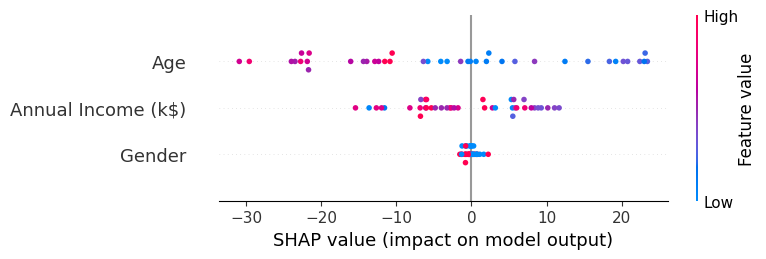

In [10]:
# Visualize feature importance
shap.summary_plot(shap_values, x_test)
